
📊 Model Performance:
                                   MAE         RMSE  R² Score
Linear Regression           746.241014   860.169377  0.976207
Ridge Regression           1281.272664  1491.187458  0.928495
Lasso Regression           1292.112345  1503.423491  0.927316
Support Vector Regression   249.325521   526.095265  0.991100


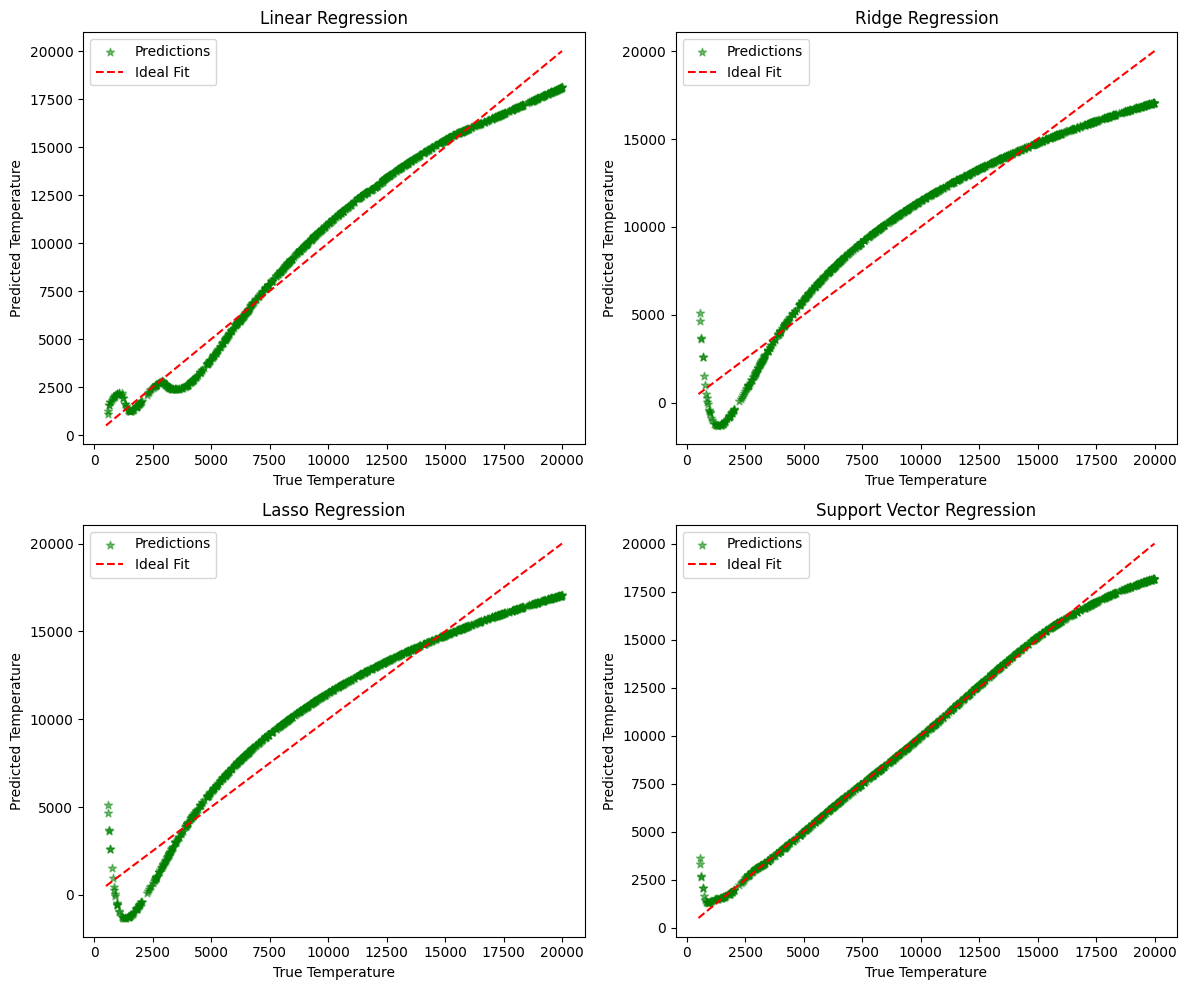

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 🔹 Load Dataset (Replace this with your actual dataset)
# Assuming you have a CSV file with 4 intensity features and 1 target (temperature)
df = pd.read_excel("Kr_line_T_varation.xlsx")  # Replace with actual file
X = df.iloc[:, :-1].values  # First 4 columns (intensities)
y = df.iloc[:, -1].values   # Last column (temperature)

# 🔹 Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Standardize Features (Important for SVR)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🔹 Define Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=1.0,max_iter=10000),
    "Support Vector Regression": SVR(kernel="rbf",gamma='scale',C=10)
}

# 🔹 Train & Evaluate Models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "R² Score": r2}

# 🔹 Display Results
results_df = pd.DataFrame(results).T
print("\n📊 Model Performance:")
print(results_df)

import string

# 🔹 Plot Predictions vs True Values for All Models
n_models = len(models)
n_cols = 2
n_rows = int(np.ceil(n_models / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
axes = axes.flatten()  # Flatten in case of single row

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)

    ax = axes[i]
    ax.scatter(y_test[::5],y_pred[::5],marker='*',color='green', alpha=0.5, label="Predictions")
    ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Ideal Fit")
    ax.set_title(name)
    ax.set_xlabel("True Temperature")
    ax.set_ylabel("Predicted Temperature")
    ax.legend()
  

# Hide any empty subplots if number of models is odd
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("Classical model predictions.pdf", format="pdf", bbox_inches="tight")

plt.show()



/home/ashwini/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.058e+08, tolerance: 3.971e+07
  model = cd_fast.enet_coordinate_descent(
/home/ashwini/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.057e+08, tolerance: 3.981e+07
  model = cd_fast.enet_coordinate_descent(
/home/ashwini/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1


📊 Model Performance:
                                   MAE         RMSE  R² Score
Linear Regression           746.241014   860.169377  0.976207
Ridge Regression           1178.619721  1371.521629  0.939511
Lasso Regression           1296.605580  1508.660630  0.926809
Support Vector Regression   249.325521   526.095265  0.991100

🔧 Best Hyperparameters:
Ridge Regression: {'alpha': 0.1}
Lasso Regression: {'alpha': 1}
Support Vector Regression: {'C': 10, 'gamma': 'scale'}


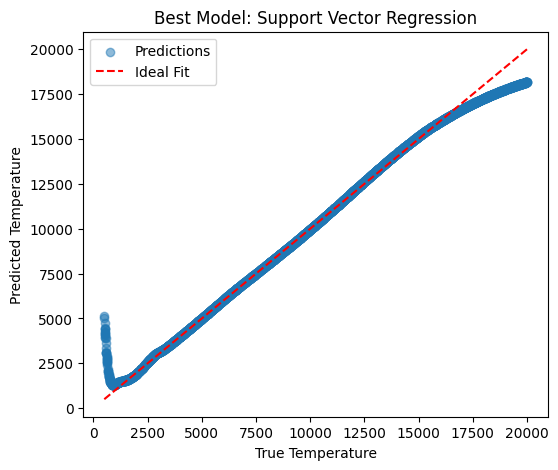

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 🔹 Load Dataset (Replace with actual dataset)
df = pd.read_excel("Kr_line_T_varation.xlsx") 
X = df.iloc[:, :-1].values  # First 4 columns (intensities)
y = df.iloc[:, -1].values   # Last column (temperature)

# 🔹 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🔹 Define Base Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Support Vector Regression": SVR()
}

# 🔹 Perform Cross-Validation (5-fold)
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="r2")
    cv_results[name] = np.mean(scores)

# 🔹 Hyperparameter Tuning using GridSearchCV
param_grid_ridge = {"alpha": [0.1, 1, 10, 100]}
param_grid_lasso = {"alpha": [0.01, 0.1, 1, 10]}
param_grid_svr = {"C": [0.1, 1, 10], "gamma": ["scale", "auto"]}

tuned_models = {
    "Ridge Regression": GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring="r2"),
    "Lasso Regression": GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring="r2"),
    "Support Vector Regression": GridSearchCV(SVR(), param_grid_svr, cv=5, scoring="r2")
}

# 🔹 Train Tuned Models
best_params = {}
for name, grid_search in tuned_models.items():
    grid_search.fit(X_train, y_train)
    best_params[name] = grid_search.best_params_
    models[name] = grid_search.best_estimator_  # Update with best model

# 🔹 Evaluate Models on Test Set
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "R² Score": r2}

# 🔹 Display Results
results_df = pd.DataFrame(results).T
print("\n📊 Model Performance:")
print(results_df)

# 🔹 Print Best Hyperparameters
print("\n🔧 Best Hyperparameters:")
for model, params in best_params.items():
    print(f"{model}: {params}")

# 🔹 Plot Predictions vs True Values for the Best Model
best_model_name = results_df["R² Score"].idxmax()
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_best, alpha=0.5, label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Ideal Fit")
plt.xlabel("True Temperature")
plt.ylabel("Predicted Temperature")
plt.title(f"Best Model: {best_model_name}")
plt.legend()
plt.show()



📊 Tree-Based Model Performance:
                     MAE       RMSE  R² Score
Decision Tree   1.040000   1.058785  1.000000
Random Forest   0.451159   0.559367  1.000000
XGBoost        18.158805  21.383741  0.999985


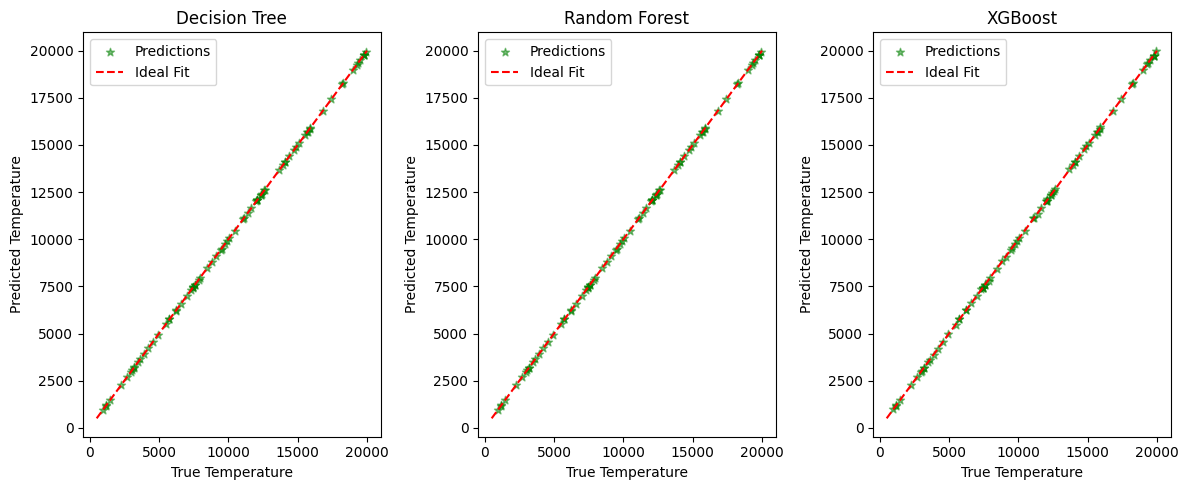

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 🔹 Load Dataset (Replace with actual dataset)
df = pd.read_excel("Kr_line_T_varation.xlsx")  
X = df.iloc[:, :-1].values  # First 4 columns (intensities)
y = df.iloc[:, -1].values   # Last column (temperature)

# 🔹 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🔹 Define Tree-Based Models
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# 🔹 Perform Cross-Validation (5-fold)
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="r2")
    cv_results[name] = np.mean(scores)

# 🔹 Train Models & Evaluate on Test Set
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "R² Score": r2}

# 🔹 Display Results
results_df = pd.DataFrame(results).T
print("\n📊 Tree-Based Model Performance:")
print(results_df)

# 🔹 Plot Predictions vs True Values for the Best Model
# 🔹 Plot Predictions vs True Values for All Models
n_models = len(models)
n_cols = 3
n_rows = int(np.ceil(n_models / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
axes = axes.flatten()  # Flatten in case of single row

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)

    ax = axes[i]
    ax.scatter(y_test[::50],y_pred[::50],marker='*',color='green', alpha=0.5, label="Predictions")
    ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Ideal Fit")
    ax.set_title(name)
    ax.set_xlabel("True Temperature")
    ax.set_ylabel("Predicted Temperature")
    ax.legend()
  

# Hide any empty subplots if number of models is odd
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("Tree based model predictions.pdf", format="pdf", bbox_inches="tight")

plt.show()



✅ Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
✅ Best XGBoost Parameters: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200, 'subsample': 1.0}

📊 Tuned Model Performance:
                             MAE       RMSE  R² Score
Random Forest (Tuned)   0.443996   0.549255  1.000000
XGBoost (Tuned)        17.565903  21.014368  0.999986


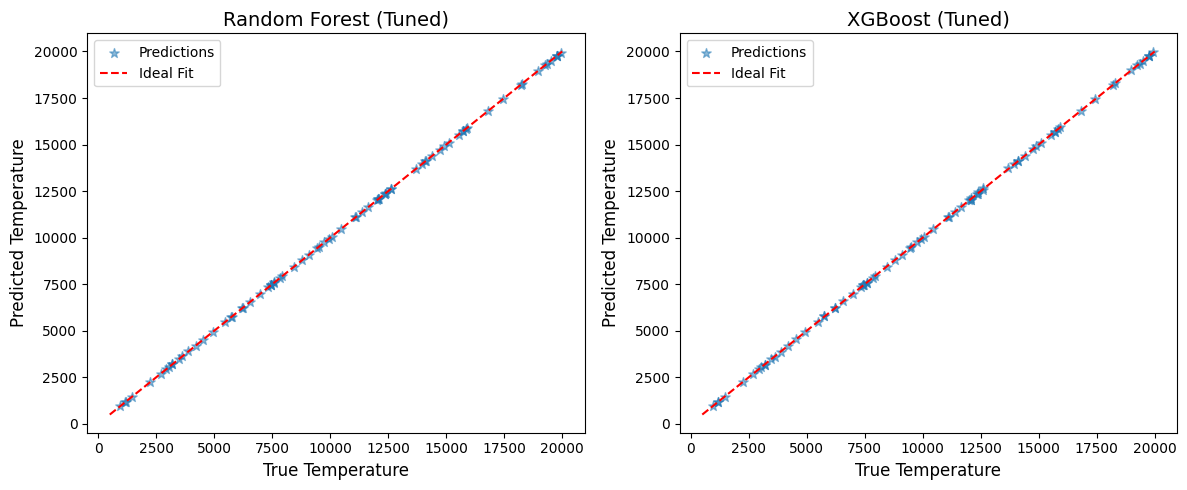

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# 🔹 Hyperparameter Grid for Random Forest
rf_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# 🔹 Hyperparameter Grid for XGBoost
xgb_params = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 6, 10],
    "subsample": [0.8, 1.0]
}

# 🔹 Grid Search for Random Forest
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring="r2", n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

# 🔹 Grid Search for XGBoost
xgb_grid = GridSearchCV(XGBRegressor(random_state=42), xgb_params, cv=5, scoring="r2", n_jobs=-1)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

# 🔹 Best Parameters
print("✅ Best Random Forest Parameters:", rf_grid.best_params_)
print("✅ Best XGBoost Parameters:", xgb_grid.best_params_)

# 🔹 Evaluate Best Models on Test Set
models = {"Random Forest (Tuned)": best_rf, "XGBoost (Tuned)": best_xgb}
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "RMSE": rmse, "R² Score": r2}

# 🔹 Display Results
results_df = pd.DataFrame(results).T
print("\n📊 Tuned Model Performance:")
print(results_df)

import string

# 🔹 Subplot configuration
n_models = len(models)
n_cols = 2
n_rows = int(np.ceil(n_models / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
axes = axes.flatten()

# 🔹 Plot predictions for each tuned model
for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    ax = axes[i]
    
    ax.scatter(y_test[::50], y_pred[::50], alpha=0.5, marker='*', s=50, label="Predictions")
    ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Ideal Fit")
    
    ax.set_title(name, fontsize=14)
    ax.set_xlabel("True Temperature", fontsize=12)
    ax.set_ylabel("Predicted Temperature", fontsize=12)
    ax.legend(fontsize=10)
    
    # Add subplot label (a), (b), ...
    # ax.text(0.02, 0.95, f"({string.ascii_lowercase[i]})", transform=ax.transAxes,
    #         fontsize=12, fontweight='bold', va='top', ha='left')

# 🔹 Remove extra axes if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("tree_based_predictions.pdf")  # 🔸 Save as PDF
plt.show()


2025-04-25 21:25:23.135759: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-25 21:25:23.137407: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-25 21:25:23.167464: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-25 21:25:23.168302: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-25 21:25:23.784905: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

122/122 [==============================] - 0s 940us/step

📊 Deep Learning Model Performance:
          MAE       RMSE  R² Score
MLP  8.429787  12.987405  0.999995
CNN  4.689976   8.333597  0.999998


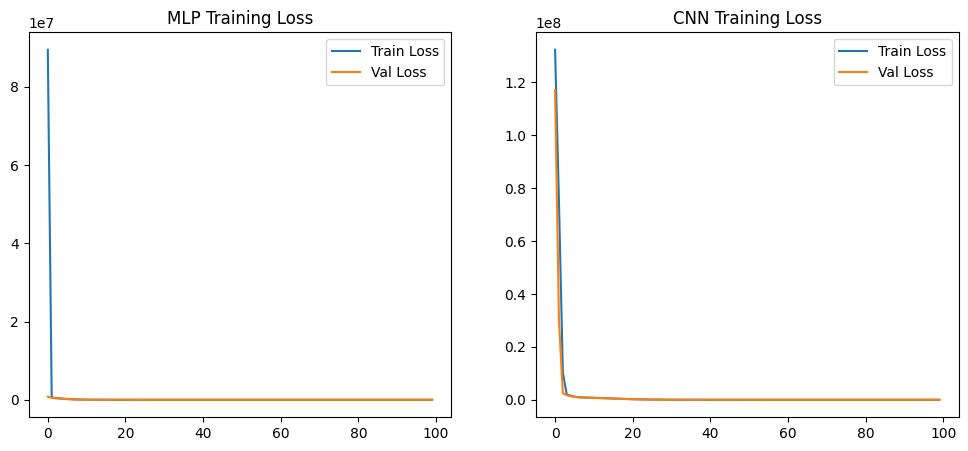

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 🔹 Load Dataset
df = pd.read_excel("Kr_line_T_varation.xlsx") 
X = df.iloc[:, :-1].values  # First 4 columns (intensities)
y = df.iloc[:, -1].values   # Last column (temperature)

# 🔹 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🔹 Reshape for CNN (4 features → 4x1 input shape)
X_train_cnn = X_train.reshape(X_train.shape[0], 4, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], 4, 1)

# 🔹 Define MLP Model
mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer
])
mlp_model.compile(optimizer='adam', loss='mse')

# 🔹 Define CNN Model
cnn_model = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(4, 1)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer
])
cnn_model.compile(optimizer='adam', loss='mse')

# 🔹 Train MLP
history_mlp = mlp_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# 🔹 Train CNN
history_cnn = cnn_model.fit(X_train_cnn, y_train, epochs=100, batch_size=32, validation_data=(X_test_cnn, y_test), verbose=0)

# 🔹 Predict
y_pred_mlp = mlp_model.predict(X_test)
y_pred_cnn = cnn_model.predict(X_test_cnn)

# 🔹 Evaluate
def evaluate_model(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R² Score": r2_score(y_true, y_pred)
    }

results = {
    "MLP": evaluate_model(y_test, y_pred_mlp),
    "CNN": evaluate_model(y_test, y_pred_cnn)
}

# 🔹 Display Results
results_df = pd.DataFrame(results).T
print("\n📊 Deep Learning Model Performance:")
print(results_df)

# 🔹 Plot Learning Curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['loss'], label="Train Loss")
plt.plot(history_mlp.history['val_loss'], label="Val Loss")
plt.title("MLP Training Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label="Train Loss")
plt.plot(history_cnn.history['val_loss'], label="Val Loss")
plt.title("CNN Training Loss")
plt.legend()

plt.show()


TypeError: savefig() missing 1 required positional argument: 'fname'

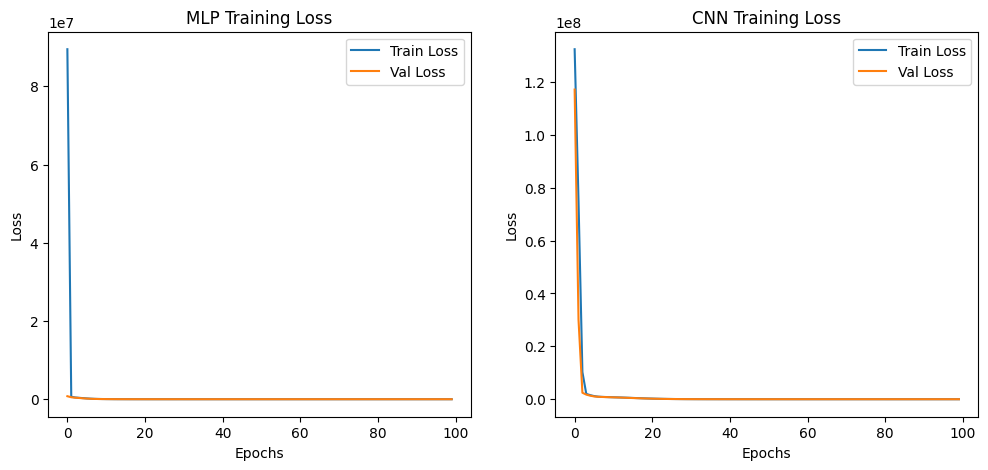

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['loss'], label="Train Loss")
plt.plot(history_mlp.history['val_loss'], label="Val Loss")
plt.title("MLP Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label="Train Loss")
plt.plot(history_cnn.history['val_loss'], label="Val Loss")
plt.title("CNN Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig("Deep learning .pdf")
# plt.tight_layout()
# plt.savefig()
plt.show()
